In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('extended_salary_data.csv')
data.head()

,YearsExperience,Salary
0,8.1,77884.67
1,19.1,127213.68
2,14.9,103343.52
3,12.4,88988.96
4,4.0,35214.78


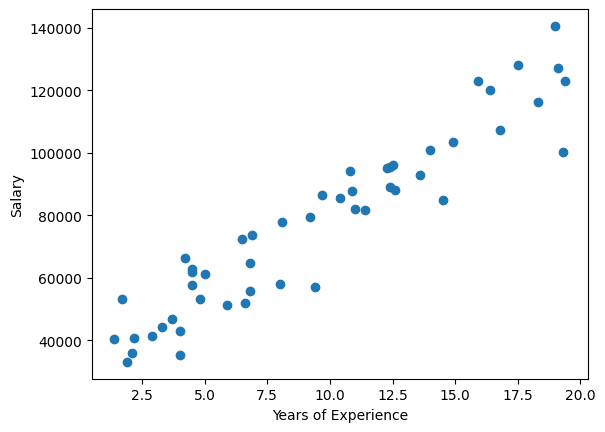

In [3]:
import matplotlib.pyplot as plt

plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [15]:
print("Mean")
print(data.mean().to_dict())
print("Median")
print(data.median().to_dict())
print("Variance")
print(data.var().to_dict())
print("Maximum")
print(data.max().to_dict())
print("Minimum")
print(data.min().to_dict())

Mean
{'YearsExperience': 9.48, 'Salary': 77370.5474}
Median
{'YearsExperience': 9.3, 'Salary': 78598.65}
Variance
{'YearsExperience': 30.09061224489796, 'Salary': 800829123.3381461}
Maximum
{'YearsExperience': 19.4, 'Salary': 140646.44}
Minimum
{'YearsExperience': 1.4, 'Salary': 33048.8}


In [21]:
from sklearn.model_selection import train_test_split
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))#verifying size
print(len(X_test))

40
10


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

slope = model.coef_  
intercept = model.intercept_ 

print(slope)
print(intercept)

[[4854.18497207]]
[31387.44340406]


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 6836.210895894568
Mean Squared Error (MSE): 79580620.27310547


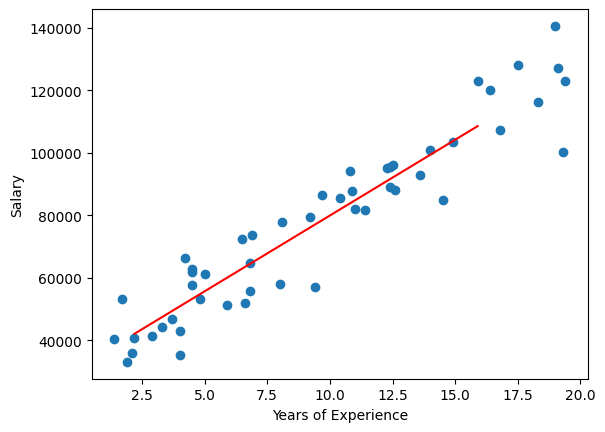

In [29]:
X_test = X_test.flatten()
sorted_indices = np.argsort(X_test)
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]
plt.plot(X_test_sorted, y_pred_sorted, color="red", label="Regression line")
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

- Bonus Task

In [43]:
base_projects = (data['YearsExperience'] / 3).round().astype(int)

# Generate random integer noise in the range of -1 to 1
noise = np.random.randint(-1, 2, size=data.shape[0])

# Add noise to the base projects and ensure positivity
data['NumProjectsCompleted'] = (base_projects + noise).clip(lower=0)

data.head()

,YearsExperience,Salary,NumProjectsCompleted
0,8.10,"77,884.67",2
1,19.10,"127,213.68",6
2,14.90,"103,343.52",4
3,12.40,"88,988.96",4
4,4.00,"35,214.78",0


In [44]:
X_multiple = data[['YearsExperience', 'NumProjectsCompleted']] 
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)
y_pred_multiple = model_multiple.predict(X_multiple)
mae_multiple = mean_absolute_error(y, y_pred_multiple)
mse_multiple = mean_squared_error(y, y_pred_multiple)

comparison_data = {
    'Metrics': ['MAE', 'MSE'],
    'Simple Linear Regression': [mae, mse],  # Placeholder values
    'Multiple Linear Regression': [mae_multiple, mse_multiple]  # Placeholder values
}

comparison_table = pd.DataFrame(comparison_data)

pd.options.display.float_format = '{:,.2f}'.format
print(comparison_table)

  Metrics  Simple Linear Regression  Multiple Linear Regression
0     MAE                  6,836.21                    7,303.22
1     MSE             79,580,620.27               81,595,811.52
